In [1]:
import pandas as pd
from datetime import datetime
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/User/Desktop/Apresentação para ifood/Ifood motorista/pedidos.csv")
df.head()

,driver_id,numero_pedido,modo_pagamento,modal,regiao,data_pedido,id_entregador,endereco_origem,dt
0,2236269,2369781599,ONLINE,CAR,GOIANIA,2020-10-14 11:45:45.200,4cea13b7-58a6-4916-8986-613d38eb0c10,"R 230 QD. 57 LT. 30-A, 234, S.LESTE UNIVERSITA...",2020-10-14
1,2236269,2369774060,ONLINE,CAR,GOIANIA,2020-10-14 11:44:00.017,4cea13b7-58a6-4916-8986-613d38eb0c10,"R 230 QD. 57 LT. 30-A, 234, S.LESTE UNIVERSITA...",2020-10-14
2,2236269,2369717959,ONLINE,CAR,GOIANIA,2020-10-14 11:30:35.849,4cea13b7-58a6-4916-8986-613d38eb0c10,"R 230 QD. 57 LT. 30-A, 234, S.LESTE UNIVERSITA...",2020-10-14
3,2236269,2369616788,ONLINE,CAR,GOIANIA,2020-10-14 10:59:39.420,4cea13b7-58a6-4916-8986-613d38eb0c10,"RUA 13 N267, 267, CONJUNTO RIVIERA, GOIANIA, ...",2020-10-14
4,2236269,2369592299,ONLINE,CAR,GOIANIA,2020-10-14 10:42:09.247,4cea13b7-58a6-4916-8986-613d38eb0c10,"RUA 13 N267, 267, CONJUNTO RIVIERA, GOIANIA, ...",2020-10-14


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   driver_id        930 non-null    int64 
 1   numero_pedido    930 non-null    object
 2   modo_pagamento   930 non-null    object
 3   modal            930 non-null    object
 4   regiao           930 non-null    object
 5   data_pedido      930 non-null    object
 6   id_entregador    930 non-null    object
 7   endereco_origem  930 non-null    object
 8   dt               930 non-null    object
dtypes: int64(1), object(8)
memory usage: 65.5+ KB


In [4]:
# Alterando para datetime a coluna data pedido e convertendo no horario brasileiro UTC-03:00
df['data_pedido'] = pd.to_datetime(df['data_pedido'])

# Criando as colunas Ano,Mês, dia e dia da semana
df['Ano'], df['Mês'] = df['data_pedido'].dt.year, df['data_pedido'].dt.month_name()
df['Dia'] = df['data_pedido'].dt.day
df['hora'] = df['data_pedido'].dt.hour
df['Dia da Semana'] = df['data_pedido'].dt.day_name()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   driver_id        930 non-null    int64         
 1   numero_pedido    930 non-null    object        
 2   modo_pagamento   930 non-null    object        
 3   modal            930 non-null    object        
 4   regiao           930 non-null    object        
 5   data_pedido      930 non-null    datetime64[ns]
 6   id_entregador    930 non-null    object        
 7   endereco_origem  930 non-null    object        
 8   dt               930 non-null    object        
 9   Ano              930 non-null    int64         
 10  Mês              930 non-null    object        
 11  Dia              930 non-null    int64         
 12  hora             930 non-null    int64         
 13  Dia da Semana    930 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(9)


In [6]:
df.dtypes

driver_id                   int64
numero_pedido              object
modo_pagamento             object
modal                      object
regiao                     object
data_pedido        datetime64[ns]
id_entregador              object
endereco_origem            object
dt                         object
Ano                         int64
Mês                        object
Dia                         int64
hora                        int64
Dia da Semana              object
dtype: object

In [7]:
df

,driver_id,numero_pedido,modo_pagamento,modal,regiao,data_pedido,id_entregador,endereco_origem,dt,Ano,Mês,Dia,hora,Dia da Semana
0,2236269,2369781599,ONLINE,CAR,GOIANIA,2020-10-14 11:45:45.200,4cea13b7-58a6-4916-8986-613d38eb0c10,"R 230 QD. 57 LT. 30-A, 234, S.LESTE UNIVERSITA...",2020-10-14,2020,October,14,11,Wednesday
1,2236269,2369774060,ONLINE,CAR,GOIANIA,2020-10-14 11:44:00.017,4cea13b7-58a6-4916-8986-613d38eb0c10,"R 230 QD. 57 LT. 30-A, 234, S.LESTE UNIVERSITA...",2020-10-14,2020,October,14,11,Wednesday
2,2236269,2369717959,ONLINE,CAR,GOIANIA,2020-10-14 11:30:35.849,4cea13b7-58a6-4916-8986-613d38eb0c10,"R 230 QD. 57 LT. 30-A, 234, S.LESTE UNIVERSITA...",2020-10-14,2020,October,14,11,Wednesday
3,2236269,2369616788,ONLINE,CAR,GOIANIA,2020-10-14 10:59:39.420,4cea13b7-58a6-4916-8986-613d38eb0c10,"RUA 13 N267, 267, CONJUNTO RIVIERA, GOIANIA, ...",2020-10-14,2020,October,14,10,Wednesday
4,2236269,2369592299,ONLINE,CAR,GOIANIA,2020-10-14 10:42:09.247,4cea13b7-58a6-4916-8986-613d38eb0c10,"RUA 13 N267, 267, CONJUNTO RIVIERA, GOIANIA, ...",2020-10-14,2020,October,14,10,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,2236269,2761655222,ONLINE,CAR,GOIANIA,2021-01-10 15:03:15.406,4cea13b7-58a6-4916-8986-613d38eb0c10,"Avenida Deputado Jamel Cecílio, 3901, JARDIM G...",2021-01-10,2021,January,10,15,Sunday
926,2236269,2761554763,ONLINE,CAR,GOIANIA,2021-01-10 14:23:38.039,4cea13b7-58a6-4916-8986-613d38eb0c10,"Avenida Deputado Jamel Cecílio, 3901, JARDIM G...",2021-01-10,2021,January,10,14,Sunday
927,2236269,2762274811,ONLINE,CAR,GOIANIA,2021-01-10 19:04:40.633,4cea13b7-58a6-4916-8986-613d38eb0c10,"Avenida C8, 540, Setor Sudoeste, GOIANIA, Brazil",2021-01-10,2021,January,10,19,Sunday
928,2236269,2760936435,ONLINE,CAR,GOIANIA,2021-01-10 11:17:11.710,4cea13b7-58a6-4916-8986-613d38eb0c10,"Avenida C8, 540, Setor Sudoeste, GOIANIA, Brazil",2021-01-10,2021,January,10,11,Sunday


In [8]:
df['Mês'] = df['Mês'].map({'January':'Janeiro',
                             'February':'Fevereiro',
                             'March':'Março',
                             'April' : 'Abril',
                             'May' : 'Maio',
                             'June' : 'Junho',               
                             'July' : 'Julho', 
                             'August' : 'Agosto',          
                             'September' : 'Setembro',
                             'October' : 'Outubro',
                             'November' : 'Novembro',                
                             'December' : 'Dezembro',                 
                             np.nan:'NY'},
                             na_action=None)

In [9]:
df['Dia da Semana'] = df['Dia da Semana'].map({'Monday':'Segunda-feira',
                             'Tuesday':'Terça-feira',
                             'Wednesday':'Quarta-feira',
                             'Thursday' : 'Quinta-feira',
                             'Friday' : 'Sexta-feira',
                             'Saturday' : 'Sábado',               
                             'Sunday' : 'Domingo',            
                             np.nan:'NY'},
                             na_action=None)

In [10]:
def Parte_do_dia(x):
    if (x >= 6) and (x < 12):
        return 'Manhã'
    elif (x >= 12) and (x < 18):
        return 'Tarde'
    else:
        return'Noite'

df['Parte do dia'] = df['data_pedido'].dt.hour.apply(Parte_do_dia)

In [11]:
df.head(5)

,driver_id,numero_pedido,modo_pagamento,modal,regiao,data_pedido,id_entregador,endereco_origem,dt,Ano,Mês,Dia,hora,Dia da Semana,Parte do dia
0,2236269,2369781599,ONLINE,CAR,GOIANIA,2020-10-14 11:45:45.200,4cea13b7-58a6-4916-8986-613d38eb0c10,"R 230 QD. 57 LT. 30-A, 234, S.LESTE UNIVERSITA...",2020-10-14,2020,Outubro,14,11,Quarta-feira,Manhã
1,2236269,2369774060,ONLINE,CAR,GOIANIA,2020-10-14 11:44:00.017,4cea13b7-58a6-4916-8986-613d38eb0c10,"R 230 QD. 57 LT. 30-A, 234, S.LESTE UNIVERSITA...",2020-10-14,2020,Outubro,14,11,Quarta-feira,Manhã
2,2236269,2369717959,ONLINE,CAR,GOIANIA,2020-10-14 11:30:35.849,4cea13b7-58a6-4916-8986-613d38eb0c10,"R 230 QD. 57 LT. 30-A, 234, S.LESTE UNIVERSITA...",2020-10-14,2020,Outubro,14,11,Quarta-feira,Manhã
3,2236269,2369616788,ONLINE,CAR,GOIANIA,2020-10-14 10:59:39.420,4cea13b7-58a6-4916-8986-613d38eb0c10,"RUA 13 N267, 267, CONJUNTO RIVIERA, GOIANIA, ...",2020-10-14,2020,Outubro,14,10,Quarta-feira,Manhã
4,2236269,2369592299,ONLINE,CAR,GOIANIA,2020-10-14 10:42:09.247,4cea13b7-58a6-4916-8986-613d38eb0c10,"RUA 13 N267, 267, CONJUNTO RIVIERA, GOIANIA, ...",2020-10-14,2020,Outubro,14,10,Quarta-feira,Manhã


In [12]:
df['Parte do dia'].value_counts()

Tarde    468
Manhã    277
Noite    185
Name: Parte do dia, dtype: int64

In [13]:
# Renomeando as colunas de data e hora

df.rename(columns={'data_pedido': 'hora_pedido'}, inplace = True)

In [14]:
df.head()

,driver_id,numero_pedido,modo_pagamento,modal,regiao,hora_pedido,id_entregador,endereco_origem,dt,Ano,Mês,Dia,hora,Dia da Semana,Parte do dia
0,2236269,2369781599,ONLINE,CAR,GOIANIA,2020-10-14 11:45:45.200,4cea13b7-58a6-4916-8986-613d38eb0c10,"R 230 QD. 57 LT. 30-A, 234, S.LESTE UNIVERSITA...",2020-10-14,2020,Outubro,14,11,Quarta-feira,Manhã
1,2236269,2369774060,ONLINE,CAR,GOIANIA,2020-10-14 11:44:00.017,4cea13b7-58a6-4916-8986-613d38eb0c10,"R 230 QD. 57 LT. 30-A, 234, S.LESTE UNIVERSITA...",2020-10-14,2020,Outubro,14,11,Quarta-feira,Manhã
2,2236269,2369717959,ONLINE,CAR,GOIANIA,2020-10-14 11:30:35.849,4cea13b7-58a6-4916-8986-613d38eb0c10,"R 230 QD. 57 LT. 30-A, 234, S.LESTE UNIVERSITA...",2020-10-14,2020,Outubro,14,11,Quarta-feira,Manhã
3,2236269,2369616788,ONLINE,CAR,GOIANIA,2020-10-14 10:59:39.420,4cea13b7-58a6-4916-8986-613d38eb0c10,"RUA 13 N267, 267, CONJUNTO RIVIERA, GOIANIA, ...",2020-10-14,2020,Outubro,14,10,Quarta-feira,Manhã
4,2236269,2369592299,ONLINE,CAR,GOIANIA,2020-10-14 10:42:09.247,4cea13b7-58a6-4916-8986-613d38eb0c10,"RUA 13 N267, 267, CONJUNTO RIVIERA, GOIANIA, ...",2020-10-14,2020,Outubro,14,10,Quarta-feira,Manhã


In [15]:
# Separando a coluna endereço_origem

df['endereco_origem'].str.split(',' , expand=True)

,0,1,2,3,4
0,R 230 QD. 57 LT. 30-A,234,S.LESTE UNIVERSITARIO,GOIANIA,Brazil
1,R 230 QD. 57 LT. 30-A,234,S.LESTE UNIVERSITARIO,GOIANIA,Brazil
2,R 230 QD. 57 LT. 30-A,234,S.LESTE UNIVERSITARIO,GOIANIA,Brazil
3,RUA 13 N267,267,CONJUNTO RIVIERA,GOIANIA,Brazil
4,RUA 13 N267,267,CONJUNTO RIVIERA,GOIANIA,Brazil
...,...,...,...,...,...
925,Avenida Deputado Jamel Cecílio,3901,JARDIM GOIAS,GOIANIA,Brazil
926,Avenida Deputado Jamel Cecílio,3901,JARDIM GOIAS,GOIANIA,Brazil
927,Avenida C8,540,Setor Sudoeste,GOIANIA,Brazil
928,Avenida C8,540,Setor Sudoeste,GOIANIA,Brazil


In [16]:
# Nomeando as novas colunas

df[['Rua', 'numero', 'Bairro', 'Cidade', 'País']] = df['endereco_origem'].str.split(',' , expand=True)
df.head(2)

,driver_id,numero_pedido,modo_pagamento,modal,regiao,hora_pedido,id_entregador,endereco_origem,dt,Ano,Mês,Dia,hora,Dia da Semana,Parte do dia,Rua,numero,Bairro,Cidade,País
0,2236269,2369781599,ONLINE,CAR,GOIANIA,2020-10-14 11:45:45.200,4cea13b7-58a6-4916-8986-613d38eb0c10,"R 230 QD. 57 LT. 30-A, 234, S.LESTE UNIVERSITA...",2020-10-14,2020,Outubro,14,11,Quarta-feira,Manhã,R 230 QD. 57 LT. 30-A,234,S.LESTE UNIVERSITARIO,GOIANIA,Brazil
1,2236269,2369774060,ONLINE,CAR,GOIANIA,2020-10-14 11:44:00.017,4cea13b7-58a6-4916-8986-613d38eb0c10,"R 230 QD. 57 LT. 30-A, 234, S.LESTE UNIVERSITA...",2020-10-14,2020,Outubro,14,11,Quarta-feira,Manhã,R 230 QD. 57 LT. 30-A,234,S.LESTE UNIVERSITARIO,GOIANIA,Brazil


In [17]:
# Eliminando as colunas que não vou utilizar

df = df.drop(columns=['driver_id','numero_pedido','modo_pagamento','regiao','id_entregador','endereco_origem', 'Rua', 'numero'])
df.head()

,modal,hora_pedido,dt,Ano,Mês,Dia,hora,Dia da Semana,Parte do dia,Bairro,Cidade,País
0,CAR,2020-10-14 11:45:45.200,2020-10-14,2020,Outubro,14,11,Quarta-feira,Manhã,S.LESTE UNIVERSITARIO,GOIANIA,Brazil
1,CAR,2020-10-14 11:44:00.017,2020-10-14,2020,Outubro,14,11,Quarta-feira,Manhã,S.LESTE UNIVERSITARIO,GOIANIA,Brazil
2,CAR,2020-10-14 11:30:35.849,2020-10-14,2020,Outubro,14,11,Quarta-feira,Manhã,S.LESTE UNIVERSITARIO,GOIANIA,Brazil
3,CAR,2020-10-14 10:59:39.420,2020-10-14,2020,Outubro,14,10,Quarta-feira,Manhã,CONJUNTO RIVIERA,GOIANIA,Brazil
4,CAR,2020-10-14 10:42:09.247,2020-10-14,2020,Outubro,14,10,Quarta-feira,Manhã,CONJUNTO RIVIERA,GOIANIA,Brazil


In [18]:
# Verificando o dia que mais teve pedidos

df["dt"].value_counts()

2020-12-03    18
2020-11-09    18
2020-11-10    17
2020-10-19    16
2020-10-08    16
              ..
2021-01-16     1
2021-04-12     1
2020-12-30     1
2020-09-14     1
2021-01-28     1
Name: dt, Length: 161, dtype: int64

<AxesSubplot:>

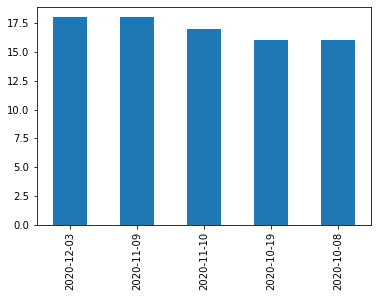

In [19]:
# Plotando o dia que mais teve pedidos

df["dt"].value_counts().head(5).plot.bar()

In [20]:
# Verificando o Bairro que mais teve pedidos

df["Bairro"].value_counts().head(10)

 JARDIM GOIAS                 344
 Setor Sudoeste               150
 SETOR LESTE UNIVERSITÁRIO     97
 Jardim Goiás                  57
 JARDIM NOVA ERA               55
 SET BUENO                     53
 AEROVIARIO                    27
 JARDIM COLORADO               18
 Vila Redenção                 13
 JARDIM GUANABARA              12
Name: Bairro, dtype: int64

<AxesSubplot:>

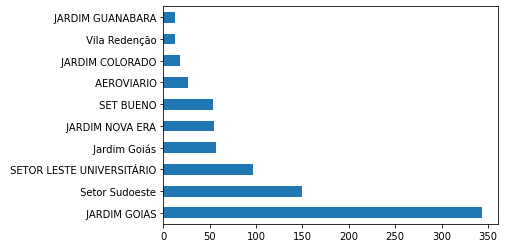

In [21]:
# Plotando o Bairro que mais teve pedidos

df["Bairro"].value_counts().head(10).plot.barh()

In [22]:
# Verificando a cidade que mais teve pedidos

df["Cidade"].value_counts()

 GOIANIA                 842
 APARECIDA DE GOIANIA     81
Name: Cidade, dtype: int64

<AxesSubplot:>

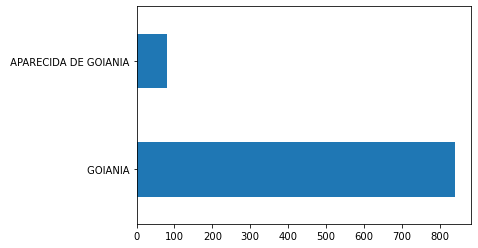

In [23]:
# Plotando a cidade que mais teve pedidos

df["Cidade"].value_counts().plot.barh()

In [24]:
df.columns

Index(['modal', 'hora_pedido', 'dt', 'Ano', 'Mês', 'Dia', 'hora',
       'Dia da Semana', 'Parte do dia', 'Bairro', 'Cidade', 'País'],
      dtype='object')

In [25]:
df["Mês"].value_counts()

Outubro      259
Novembro     244
Dezembro     135
Setembro     100
Janeiro       50
Fevereiro     42
Abril         29
Julho         23
Março         18
Maio          17
Junho          9
Agosto         4
Name: Mês, dtype: int64

<AxesSubplot:>

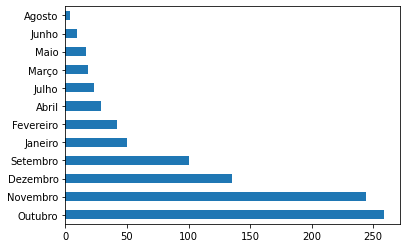

In [26]:
df["Mês"].value_counts().plot.barh()

In [27]:
df["Dia"].value_counts()

24    53
9     52
22    49
3     47
8     45
27    39
10    39
21    37
6     36
5     35
15    35
14    34
23    31
7     30
20    30
26    29
13    29
18    28
2     27
19    27
16    27
1     25
11    20
4     20
25    19
12    18
28    17
17    16
29    16
30    15
31     5
Name: Dia, dtype: int64

<AxesSubplot:>

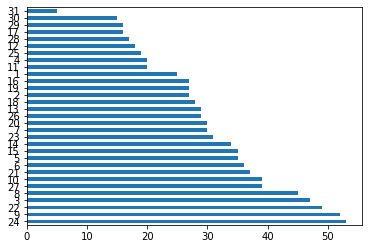

In [28]:
df["Dia"].value_counts().plot.barh()

In [29]:
df["hora"].value_counts()

15    99
10    95
11    92
13    87
14    81
12    75
16    65
17    61
18    46
9     44
19    42
20    31
8     26
22    25
21    23
7     17
23     7
0      5
1      4
6      3
3      1
2      1
Name: hora, dtype: int64

<AxesSubplot:>

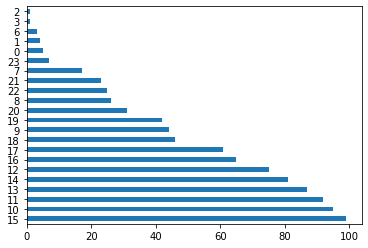

In [30]:
df["hora"].value_counts().plot.barh()

In [31]:
df["Dia da Semana"].value_counts()

Quinta-feira     200
Terça-feira      191
Quarta-feira     151
Segunda-feira    122
Sexta-feira      111
Sábado           106
Domingo           49
Name: Dia da Semana, dtype: int64

<AxesSubplot:>

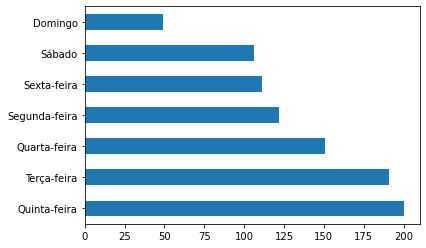

In [32]:
df["Dia da Semana"].value_counts().plot.barh()

In [33]:
df.head()

,modal,hora_pedido,dt,Ano,Mês,Dia,hora,Dia da Semana,Parte do dia,Bairro,Cidade,País
0,CAR,2020-10-14 11:45:45.200,2020-10-14,2020,Outubro,14,11,Quarta-feira,Manhã,S.LESTE UNIVERSITARIO,GOIANIA,Brazil
1,CAR,2020-10-14 11:44:00.017,2020-10-14,2020,Outubro,14,11,Quarta-feira,Manhã,S.LESTE UNIVERSITARIO,GOIANIA,Brazil
2,CAR,2020-10-14 11:30:35.849,2020-10-14,2020,Outubro,14,11,Quarta-feira,Manhã,S.LESTE UNIVERSITARIO,GOIANIA,Brazil
3,CAR,2020-10-14 10:59:39.420,2020-10-14,2020,Outubro,14,10,Quarta-feira,Manhã,CONJUNTO RIVIERA,GOIANIA,Brazil
4,CAR,2020-10-14 10:42:09.247,2020-10-14,2020,Outubro,14,10,Quarta-feira,Manhã,CONJUNTO RIVIERA,GOIANIA,Brazil


In [34]:
df.to_csv('APRESENTAÇÃO IFOOD/dados_IFOODENTREGADOR.csv', index=False)